# Project: EDA on Medical Appointment Attendance in Brazil

## Author: Ben Farrell
## Date: 03/04/2020

## Table of Contents
<ul>
<li><a href="#exec">Exectutive Summary</a></li>
<li><a href="#Acr">Acronyms</a></li>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#ref">References</a></li>  
</ul>

<a id='exec'></a>
## Executive Summary

This project consisted of evaluating patient attendance data.

Prior to the investigation, the following questions were posed:

1. Does Gender impact the likihood of a patient attending the appointment?
2. Does Welfare Status impact the likihood of a patient attending the appointment?
3. Does appointment day impact the likihood of a patient attending the appointment?
4. Does an SMS Notification impact the likihood of a patient attending the appointment?


The analysis revealed the following:

 - Gender makes virutally no impact on attendance. Males and females both attend/miss appointments at the same rate.
 
 - Patients on welfare were slightly more likely to miss their appointment.

 - Thursday appointments had the lowest likelihood "no-show", whereas the highest "no-show" rate was Saturday.

 - Counterintuitively, patients who received an SMS were more likely to miss their appointment.

<a id='Acr'></a>
## Acronyms

 - With Respect To - WRT

<a id='intro'></a>
## Introduction

Import necessary libraries and modules and set some parameters for plotting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
from IPython.display import Markdown, display
import datetime

%matplotlib inline


# Add some predefined formatting for matplotlib
plt.rcParams['figure.figsize'] = (12,6)
axisfont = 14
labelfont = 15

Create a function to enable markdown style print functions

In [2]:
def printmd(string):
    display(Markdown(string))

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
print('The data set has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The data set has 110527 rows and 14 columns


The columns is this Data Set Are:

- PatientID - Unique ID for each patient. **This feature will be dropped**
- AppointmentID - Unique ID for each appointment. **This feature will be dropped**
- Gender - Male / Female
- ScheduleDay - Date the appointment was scheduled
- AppointmentDay - Date of appointment
- Age - Age of patient in years.
- Neighbourhood - Where the appointment takes place
- Scholarship - Binary (1/0) whether the patient is entitled to Social Welfare or not. Yes = 1, No = 0
- Hipertension - Binary (1/0) whether the patient has Hipertension or not. Yes = 1, No = 0
- Diabetes - Binary (1/0) whether the patient has Diabetes or not. Yes = 1, No = 0
- Alcoholism - Binary (1/0) whether the patient has Alcoholism or not. Yes = 1, No = 0
- Handcap - Score of 0 - 4 for Disability Scale.
    - 0 - No disability
    - 1 - Minor
    - 2 - Moderate
    - 3 - High
    - 4 - Severe
- SMS_received - Binary (1/0) whether the patient received a text message reminder. Yes = 1, No = 0
- No-show - Binary (Yes/No) whether the patient showed up. No = Attended, Yes = Did not attend

### Check for any Duplicate Rows and Missing Values


There are no duplicated rows in the data

In [5]:
df.duplicated().unique()

array([False])

There are no missing values in the dataset

In [6]:
df.isna().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

### Remove Features that Provide No Insight

PatientID and AppointId are only ID tags and don't provide any insight into our analysis of determining what factors influence a patient showing up for an appointment.

In [7]:
df.drop(['AppointmentID','PatientId'],axis=1,inplace=True)

- Now satisfied that patientId and AppointmentID have been deleted from the datatframe.


- It is evident that there are no missing values as each feature has __110527__ rows.

### Further Data Inspection & Cleaning

- The data in ScheduleDay and AppointmentDay is currently stored as a String.


- This is to be converted to DataTime Format

In [8]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.normalize()
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.normalize()

Review our dataset to spot anomolies and outliers

In [9]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


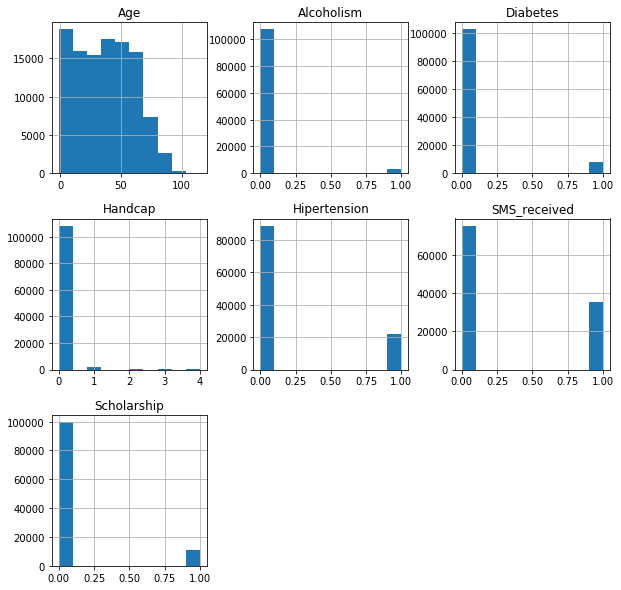

In [10]:
df.hist(figsize=(10,10));

 - Reviewing the output from the describe function shows that all features except __Age__ appear to have consistant data and no outliers.
 

 - The __Age__ column has a minimum of __-1 year__. This needs to be investigated becaues it is not possible to have an age less than 0.
 
 
 - The distribution of ages will be reviewed visually with a histrogram.

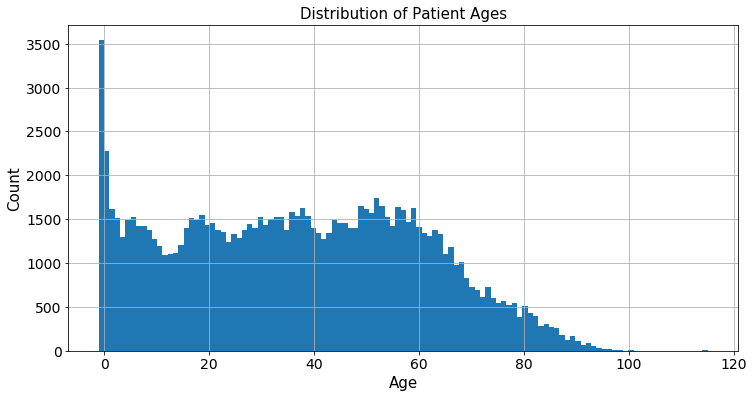

In [11]:
plt.hist(df.Age,bins=115)
plt.title('Distribution of Patient Ages',fontsize=labelfont)
plt.xlabel('Age',fontsize=labelfont);
plt.ylabel('Count',fontsize=labelfont)
plt.grid(b=True,which='major',axis='both')
plt.xticks(fontsize=axisfont)
plt.yticks(fontsize=axisfont);
#plt.legend(loc='best',fontsize=labelfont);

In [12]:
df[df['Age'] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06 00:00:00+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


There is only a single case where the age is -1. This row will be dropped from the dataframe.

In [13]:
minusage = df[df['Age'] < 0]
df.drop(minusage.index,inplace=True)

It is now evident that the remaining age data for patients is all >= 0 years.

Those patients with age zero can be assumed to be babies who are less than 1 year old. 

Young babies are likely to require regular checkups which is confirmed by the data as ther is a skew to the LHS.

I would like to review the distribution of data on Disability "Handcap" column.

In [14]:
df['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

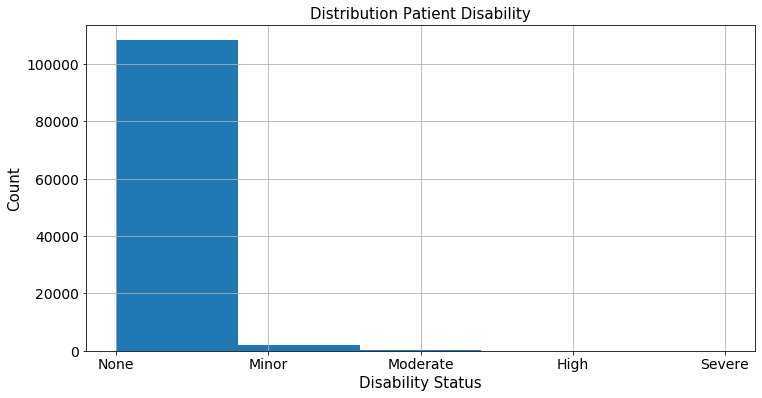

In [15]:
disability = ['None','Minor','Moderate','High','Severe']
plt.hist(df.Handcap,bins=5)
plt.title('Distribution Patient Disability',fontsize=labelfont)
plt.xlabel('Disability Status',fontsize=labelfont);
plt.ylabel('Count',fontsize=labelfont)
plt.grid(b=True,which='major',axis='both')
plt.xticks(np.arange(5),disability,fontsize=axisfont)
plt.yticks(fontsize=axisfont);

The distribution of patients with ranging disabilities appears to follow the expected pattern. Most of the sample population no disabilty. Increasing disability rating is accompanies by an excpected drop is cases.

### Additional Features

I will now extract some additional features to help with the analysis. 

1. Day of the week the Appointment was scheduled for.
2. Time period between booking and appointment - Unit Days
3. I will make the No-Show columns more intuative.
     - Missed appointments will be labelled **NoShow**
     - Attended appointments will be labelled **Attended**

#### Extract Day of Week From Appointment

In [16]:
df['Week_Day'] = df['AppointmentDay'].dt.day_name()
df['Week_Day'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: Week_Day, dtype: int64

#### Generate new column with time period between booking and appointment

In [17]:
df['Wait'] = (df['AppointmentDay'] - df['ScheduledDay']).apply(lambda x: x.days)

#### Make No-Show column more intuative

In [18]:
rename = {'Yes':'NoShow','No':'Attended'}
df['No-show'] = df['No-show'].apply(lambda x: rename[x])

Perform a final check on the dataframe before commencing the EDA

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110526 non-null  object             
 1   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 3   Age             110526 non-null  int64              
 4   Neighbourhood   110526 non-null  object             
 5   Scholarship     110526 non-null  int64              
 6   Hipertension    110526 non-null  int64              
 7   Diabetes        110526 non-null  int64              
 8   Alcoholism      110526 non-null  int64              
 9   Handcap         110526 non-null  int64              
 10  SMS_received    110526 non-null  int64              
 11  No-show         110526 non-null  object             
 12  Week_Day        110526 non-null  object             
 13  Wait          

<a id='eda'></a>
## Exploratory Data Analysis

### Review overall appointment attendance rates

In [20]:
printmd('On average, **{:.2f}%** of patients do not show up for their appointment.'.format(100*df[df['No-show']=='NoShow'].shape[0]/df.shape[0]))

On average, **20.19%** of patients do not show up for their appointment.

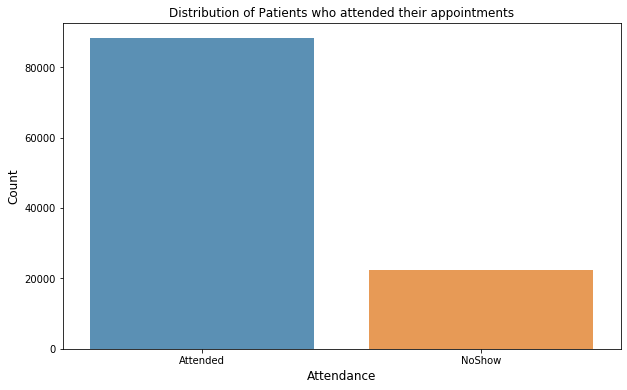

In [21]:
noshows  = df['No-show'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(noshows.index, noshows.values, alpha=0.8)
plt.title('Distribution of Patients who attended their appointments')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Attendance', fontsize=12)
plt.show()

### Time Period of Evaluation

In [22]:
printmd('The observation period was **{} days**'.format((df['AppointmentDay'].max() - df['AppointmentDay'].min()).days))

The observation period was **40 days**

### Question 1: Does Gender impact the likihood of a patient attending the appointment?

In [23]:
mf = df.groupby(['No-show','Gender'],as_index=False)['ScheduledDay'].count()
mf.rename(columns={'ScheduledDay':'Count'},inplace=True)
mf

,No-show,Gender,Count
0,Attended,F,57245
1,Attended,M,30962
2,NoShow,F,14594
3,NoShow,M,7725


In [24]:
nsmale = df['Age'][(df['No-show'] == 'NoShow') & (df['Gender'] == 'M')].count().sum()
smale = df['Age'][(df['No-show'] == 'Attended') & (df['Gender'] == 'M')].count().sum()
male = df['Age'][df['Gender'] == 'M'].count().sum()
nsm_pc = 100*nsmale/male
sm_pc = 100*smale/male

nsfemale = df['Age'][(df['No-show'] == 'NoShow') & (df['Gender'] == 'F')].count().sum()
sfemale = df['Age'][(df['No-show'] == 'Attended') & (df['Gender'] == 'F')].count().sum()
female = df['Age'][df['Gender'] == 'F'].count().sum()
nsfm_pc = 100*nsfemale/female
sfm_pc = 100*sfemale/female

printmd('Gender does not appear to impact appointment attendance.\
        \nNo show rate for males: **{:.2f}%** \nNo show rate for females **{:.2f}%**'.format(nsm_pc,nsfm_pc))

Gender does not appear to impact appointment attendance.        
No show rate for males: **19.97%** 
No show rate for females **20.31%**

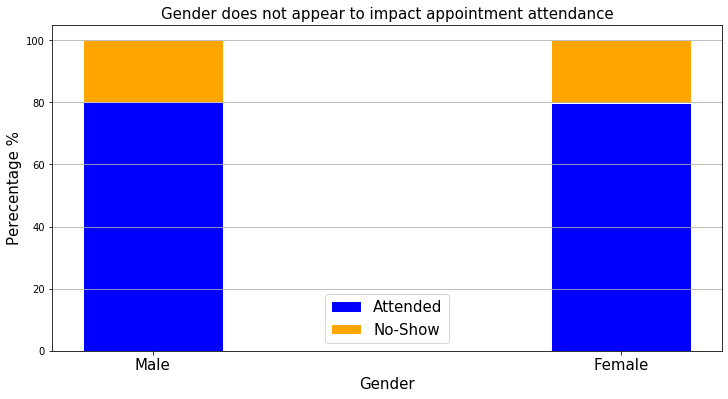

In [25]:
r = [1,2]
barWidth = 0.3
names = ['Male','Female']
show = [sm_pc,sfm_pc]
noshow = [nsm_pc,nsfm_pc]
ax = plt.bar(r, show, color='blue', edgecolor='white', width=barWidth,label='Attended')
plt.bar(r, noshow, bottom=show, color='orange', edgecolor='white', width=barWidth,label='No-Show')
plt.xticks(r,names,fontsize=labelfont)
plt.legend(loc='best',fontsize=labelfont)
plt.grid(which='major',axis='y')
plt.xlabel('Gender',fontsize=labelfont)
plt.ylabel('Perecentage %', fontsize=labelfont)
plt.title('Gender does not appear to impact appointment attendance',fontsize=labelfont)
plt.show()

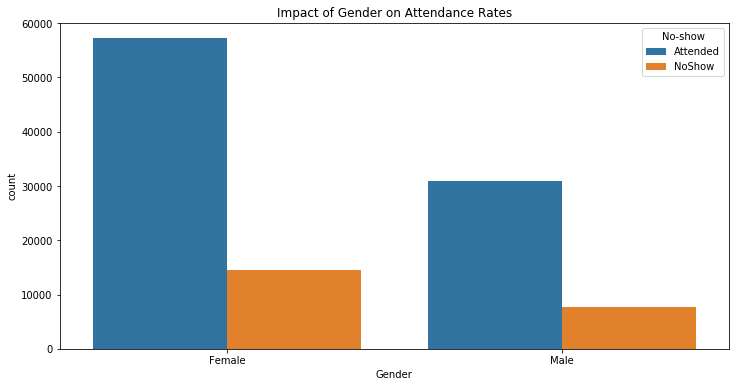

In [43]:
g = sns.countplot(x=df.Gender, hue=df['No-show'], data=df)
g.set_title('Impact of Gender on Attendance Rates')
x_ticks_labels = ['Female','Male']
g.set_xticklabels(x_ticks_labels)
plt.show()

### Question 2: Does Welfare Status impact the likihood of a patient attending the appointment?

In [27]:
sw = df.groupby(['No-show','Scholarship'],as_index=False)['ScheduledDay'].count()
sw.rename(columns={'ScheduledDay':'Count'},inplace=True)
sw

,No-show,Scholarship,Count
0,Attended,0,79924
1,Attended,1,8283
2,NoShow,0,19741
3,NoShow,1,2578


In [28]:
nswelfare = df['Gender'][(df['No-show'] == 'NoShow') & (df['Scholarship'] == 1)].count().sum()
swelfare = df['Gender'][(df['No-show'] == 'Attended') & (df['Scholarship'] == 1)].count().sum()
welfare = df['Gender'][df['Scholarship'] == 1].count().sum()
nsw_pc = 100*nswelfare/welfare
sw_pc = 100*swelfare/welfare

nsnw = df['Gender'][(df['No-show'] == 'NoShow') & (df['Scholarship'] == 0)].count().sum()
snw = df['Gender'][(df['No-show'] == 'Attended') & (df['Scholarship'] == 0)].count().sum()
nw = df['Gender'][df['Scholarship'] == 0].count().sum()
nsnw_pc = 100*nsnw/nw
snw_pc = 100*snw/nw

printmd('The proportion of patients who didn\'t attend their appointment was slightly higher\
 for those who receive welfare: <br/> \
No show rate on welfare: **{:.2f}%** <br/>\
No show rate without welfare **{:.2f}%**'.format(nsw_pc,nsnw_pc))

The proportion of patients who didn't attend their appointment was slightly higher for those who receive welfare: <br/> No show rate on welfare: **23.74%** <br/>No show rate without welfare **19.81%**

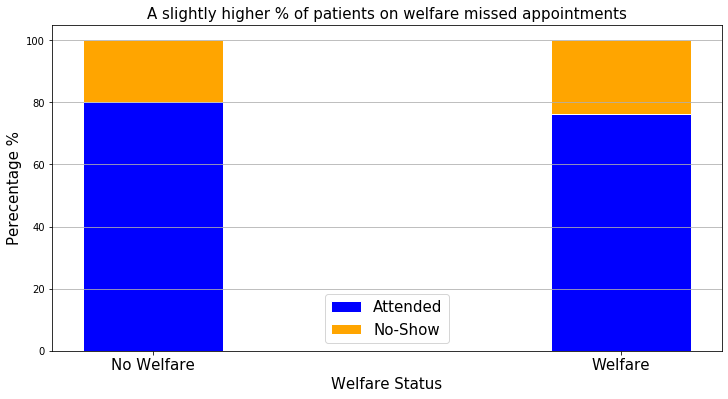

In [44]:
r = [1,2]
barWidth = 0.3
names = ['No Welfare','Welfare']
show = [snw_pc,sw_pc]
noshow = [nsnw_pc,nsw_pc]
ax = plt.bar(r, show, color='blue', edgecolor='white', width=barWidth,label='Attended')
plt.bar(r, noshow, bottom=show, color='orange', edgecolor='white', width=barWidth,label='No-Show')
plt.xticks(r,names,fontsize=labelfont)
plt.legend(loc='best',fontsize=labelfont)
plt.grid(which='major',axis='y')
plt.xlabel('Welfare Status',fontsize=labelfont)
plt.ylabel('Perecentage %', fontsize=labelfont)
plt.title('A slightly higher % of patients on welfare missed appointments',fontsize=labelfont)
plt.show()

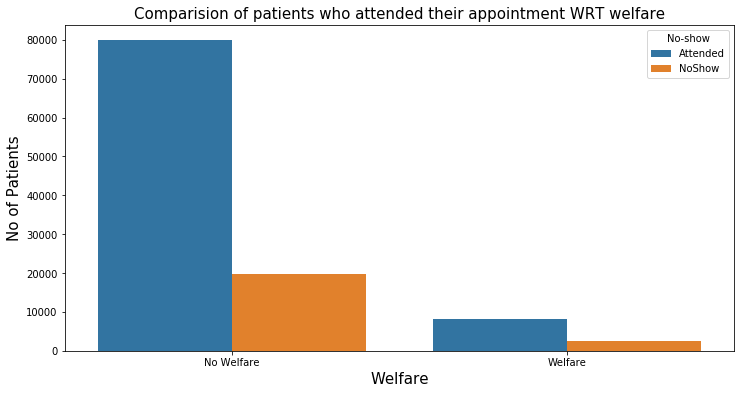

In [30]:
g = sns.countplot(x=df['Scholarship'], hue=df['No-show'], data=df)
g.set_title('Comparision of patients who attended their appointment WRT welfare',fontsize=labelfont)
x_ticks_labels = ['No Welfare','Welfare']
g.set_xticklabels(x_ticks_labels)
g.set_xlabel('Welfare',fontsize=labelfont)
g.set_ylabel('No of Patients',fontsize=labelfont)
plt.show()

### Question 3: Does appointment day impact the likihood of a patient attending the appointment?

The data clearly shows that the majority of appointments are __Monday-Friday__

__Satruday__ has a small number of appointments

The clinic is likely closed on __Sunday__, so no appointments are recorded.

In [31]:
df['Week_Day'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: Week_Day, dtype: int64

Create a list to order the xticks on the bar chart below

In [32]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

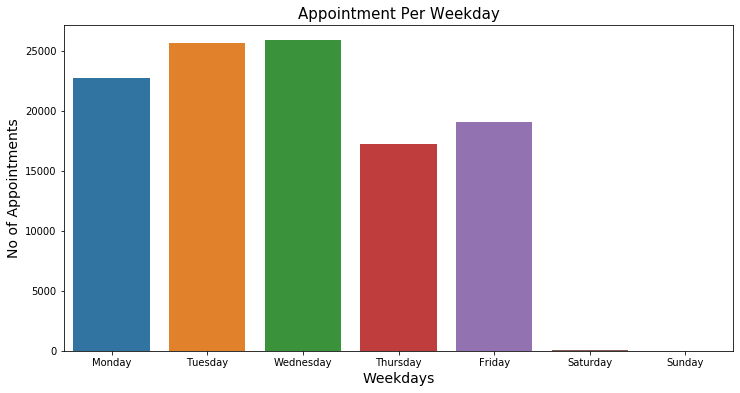

In [33]:
g = sns.countplot(x=df['Week_Day'],order=days)
g.set_title('Appointment Per Weekday',fontsize=labelfont)
g.set_ylabel('No of Appointments',fontsize=axisfont)
g.set_xlabel('Weekdays',fontsize=axisfont);

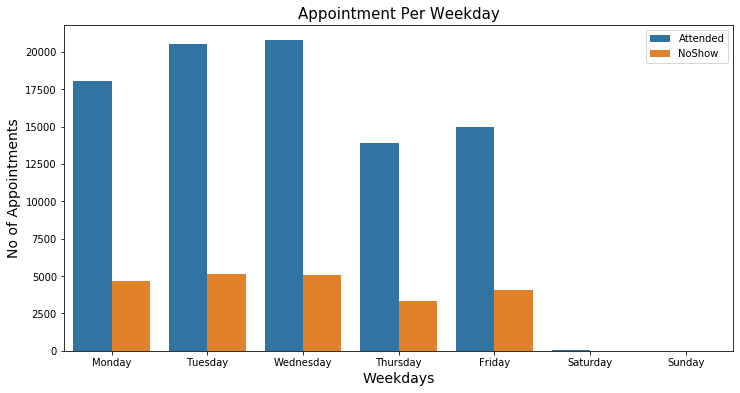

In [34]:
g = sns.countplot(x=df['Week_Day'],hue=df['No-show'],order=days)
g.set_title('Appointment Per Weekday',fontsize=labelfont)
g.set_ylabel('No of Appointments',fontsize=axisfont)
g.set_xlabel('Weekdays',fontsize=axisfont)
plt.legend(loc='upper right');

In [35]:
dfweek = df[df['No-show'] == 'NoShow'].groupby(['Week_Day']).count()/df.groupby(['Week_Day']).count()
results = dfweek['No-show']

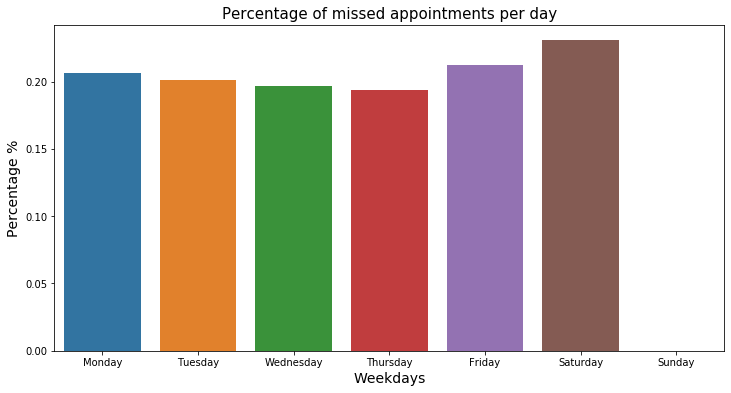

In [36]:
g = sns.barplot(x=dfweek.index,y=dfweek['No-show'],order=days)
g.set_title('Percentage of missed appointments per day',fontsize=labelfont)
g.set_ylabel('Percentage %',fontsize=axisfont)
g.set_xlabel('Weekdays',fontsize=axisfont);

In [37]:
weekday = df.groupby(['No-show','Week_Day'],as_index=False)['ScheduledDay'].count()
weekday.rename(columns={'ScheduledDay':'Count'},inplace=True)
weekday

,No-show,Week_Day,Count
0,Attended,Friday,14982
1,Attended,Monday,18024
2,Attended,Saturday,30
3,Attended,Thursday,13909
4,Attended,Tuesday,20488
5,Attended,Wednesday,20774
6,NoShow,Friday,4037
7,NoShow,Monday,4690
8,NoShow,Saturday,9
9,NoShow,Thursday,3338


In [38]:
printmd('**Thursday** has the lowest % of no shows at **{:.2f}%** <br/> \
**Saturday** has the highest % of no shows **{:.2f}%**'.format(results['Thursday']*100,results['Saturday']*100))

**Thursday** has the lowest % of no shows at **19.35%** <br/> **Saturday** has the highest % of no shows **23.08%**

### Question 4: Does an SMS Notification impact the likihood of a patient attending the appointment?

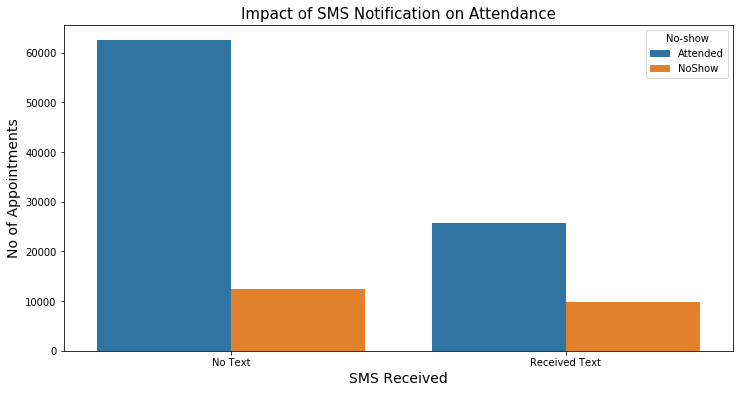

In [39]:
g = sns.countplot(x=df['SMS_received'],hue=df['No-show'])
g.set_title('Impact of SMS Notification on Attendance',fontsize=labelfont)
g.set_ylabel('No of Appointments',fontsize=axisfont)
g.set_xlabel('SMS Received',fontsize=axisfont)
g.set_xticklabels(['No Text','Received Text']);

In [40]:
dfsms = df[df['No-show'] == 'NoShow'].groupby(['SMS_received']).count()/df.groupby(['SMS_received']).count()
results = dfsms['No-show']
results

SMS_received
0    0.167035
1    0.275745
Name: No-show, dtype: float64

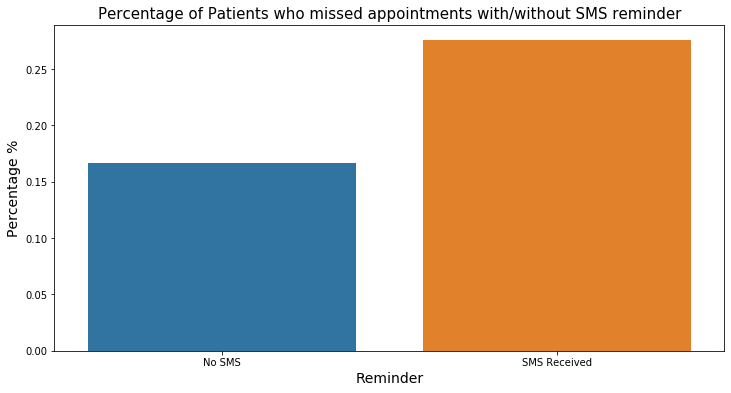

In [41]:
g = sns.barplot(x=dfsms.index,y=dfsms['No-show'])
g.set_title('Percentage of Patients who missed appointments with/without SMS reminder',fontsize=labelfont)
g.set_ylabel('Percentage %',fontsize=axisfont)
g.set_xlabel('Reminder',fontsize=axisfont)
g.set_xticklabels(['No SMS','SMS Received']);

In [42]:
printmd('Patients who didn\'t receive an SMS reminder missed fewer appointments: **{:.2f}%** <br/> <br/> \
Patients who received an SMS reminder missed more appointments **{:.2f}%**'.format(results[0]*100,results[1]*100))

Patients who didn't receive an SMS reminder missed fewer appointments: **16.70%** <br/> <br/> Patients who received an SMS reminder missed more appointments **27.57%**

<a id='conclusions'></a>
## Conclusions

### Comments on Dataset

The data required very little cleaning. There were no missing values and only a small fraction of annomolies.

The obseravation period was only for a 40 days, which may not be entirely representative of longer term patient attendance rates.

On average, only 20% of patients missed appointments.

### Research Questions

 - __Question 1__: Does Gender impact the likihood of a patient attending the appointment?

Gender didn't appear to make an impact on patient attendance likelihood. __Both male and female patients missed around 20% of their appointments__
 
 
 - __Question 2__: Does Welfare Status impact the likihood of a patient attending the appointment?

Patients on Welfare were more likely to miss their appointment. __24% of patients on welfare didn't show up__, whereas only __20% of those not on welfare missed their appointments.__


 - __Question 3__: Does appointment day impact the likihood of a patient attending the appointment?

Yes day of the week does have an impact. Appointments booked on a Thursday have the lowest likelihood of being missed. Appointments booked on a Saturday have the highest likelihood of being missed. 
 
No show rate on Thursday is 19%
No show rate on Saturday is 23% 
                 
 - __Question 4__: Does an SMS Notification impact the likihood of a patient attending the appointment?

Patients who received an SMS were more likely to miss their appointment.
 
28% of patients who received an SMS reminder missed their appointment.
Whereas, only 16% of patients who didn't receive an SMS reminder missed their appointment.

This is counter intuitative. One would expect higher attendance with a reminder.

<a id='ref'></a>
## References

https://www.kaggle.com/joniarroba/noshowappointments/kernels